# New Workflow

>>> LOADING DATA...
>>> BASIC EDA - UNIVARIATE ANALYSIS...

1. DATASET OVERVIEW:
Training data shape: (1267, 14)
Test data shape: (1267, 14)
Training columns: ['ID', 'label', 'statement', 'subject', 'speaker', 'speaker_job_title', 'state_info', 'party_affiliation', 'barely_true_counts', 'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts', 'context']

2. TARGET VARIABLE ANALYSIS:
Label distribution in training data:
label
half-true      265
false          249
mostly-true    241
barely-true    212
true           208
pants-fire      92
Name: count, dtype: int64

Label distribution in test data:
label
half-true      265
false          249
mostly-true    241
barely-true    212
true           208
pants-fire      92
Name: count, dtype: int64


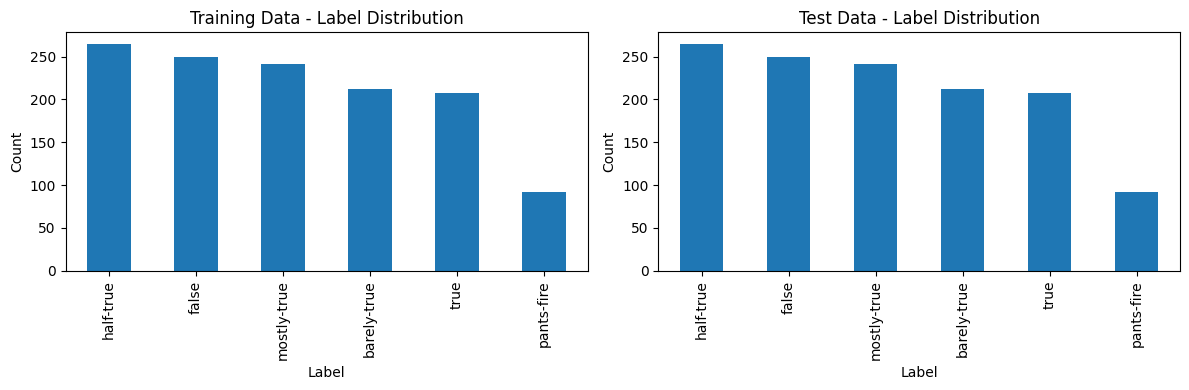


3. NUMERICAL FEATURES ANALYSIS:
Numerical features summary (Training data):
       barely_true_counts  false_counts  half_true_counts  mostly_true_counts  \
count         1267.000000   1267.000000       1267.000000         1267.000000   
mean            11.770324     13.465667         17.566693           16.912391   
std             18.980496     23.956307         36.109290           36.499879   
min              0.000000      0.000000          0.000000            0.000000   
25%              0.000000      0.000000          1.000000            1.000000   
50%              3.000000      3.000000          3.000000            3.000000   
75%             12.000000     17.000000         15.000000           14.000000   
max             70.000000    114.000000        160.000000          163.000000   

       pants_on_fire_counts  
count           1267.000000  
mean               6.016575  
std               15.059981  
min                0.000000  
25%                0.000000  
50%          

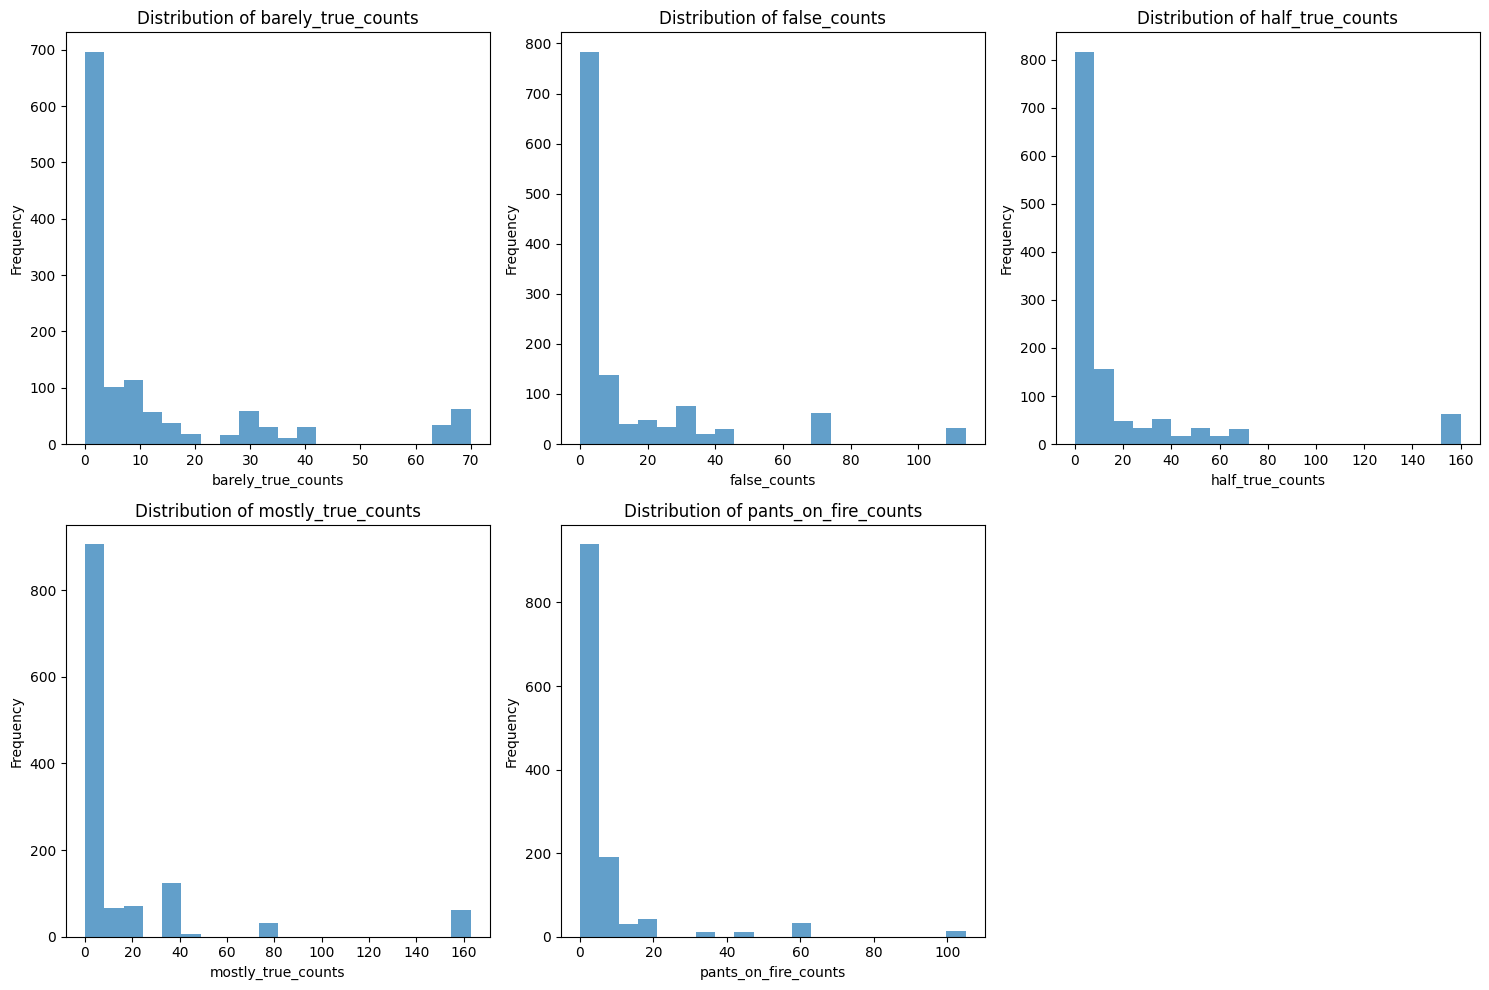


4. CATEGORICAL FEATURES ANALYSIS:

subject - Top 10 values:
subject
health-care             40
elections               31
education               30
candidates-biography    30
federal-budget          21
economy                 21
taxes                   19
immigration             18
foreign-policy          15
transportation          14
Name: count, dtype: int64

speaker - Top 10 values:
speaker
barack-obama       62
donald-trump       33
hillary-clinton    31
john-mccain        21
rick-scott         21
rick-perry         17
scott-walker       17
mitt-romney        17
marco-rubio        14
chris-christie     13
Name: count, dtype: int64

speaker_job_title - Top 10 values:
speaker_job_title
President                     62
U.S. Senator                  55
Governor                      55
U.S. senator                  36
President-Elect               33
Presidential candidate        32
U.S. Representative           20
Milwaukee County Executive    17
Former governor               17
Sena

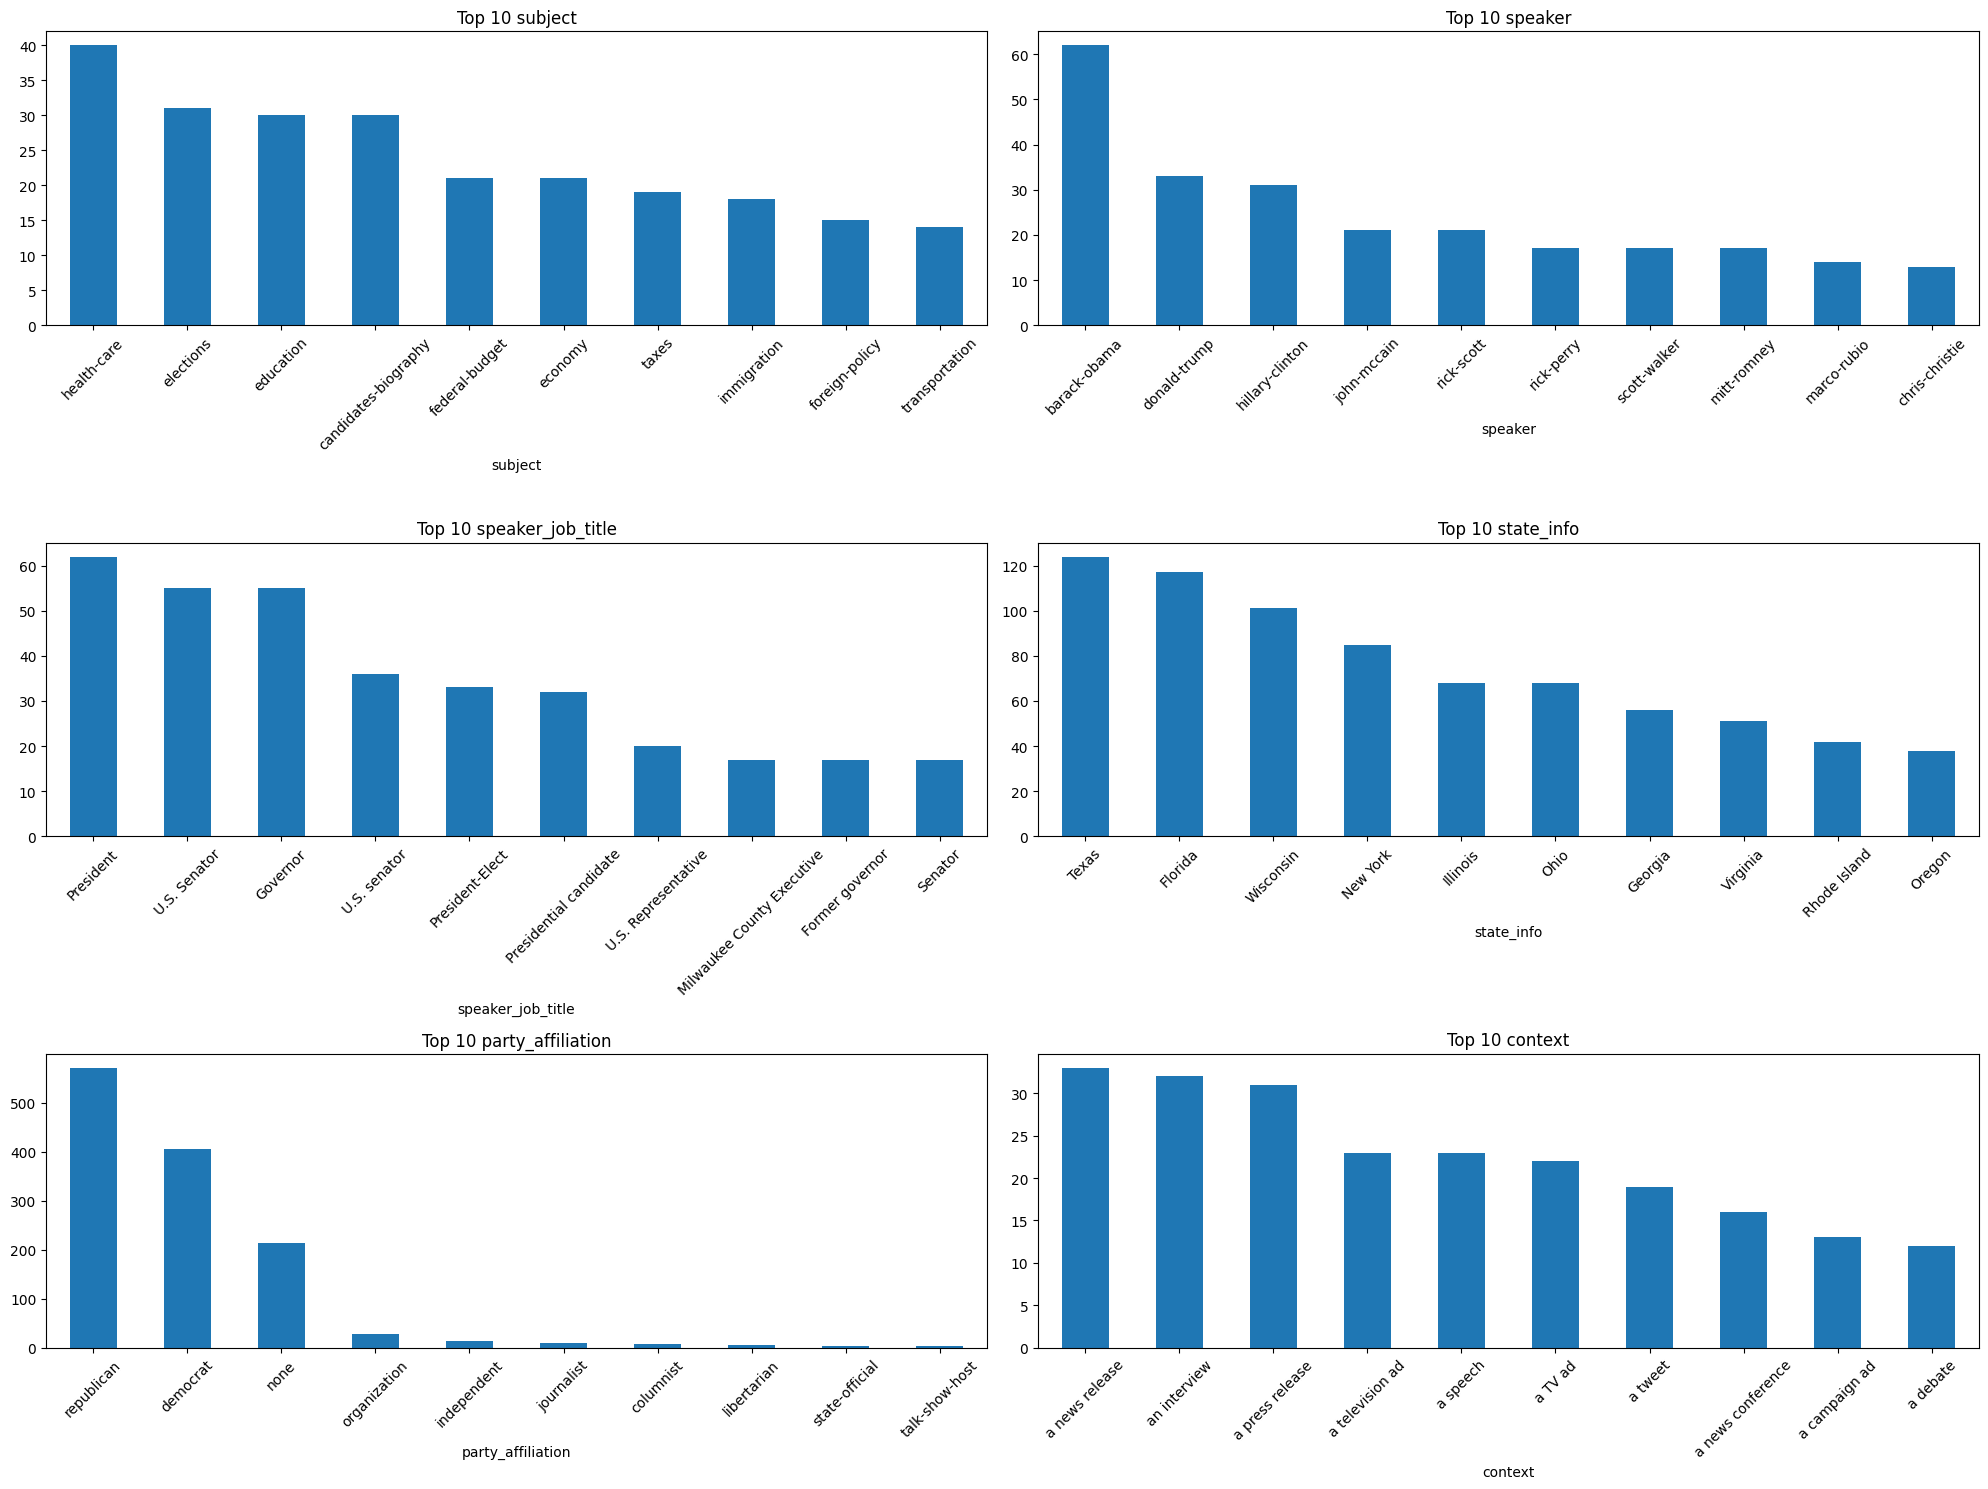


5. TEXT FEATURE ANALYSIS:
Statement length statistics (Training data):
count    1267.000000
mean      109.578532
std        98.031030
min        12.000000
25%        74.000000
50%        98.000000
75%       133.000000
max      2941.000000
Name: statement_length, dtype: float64


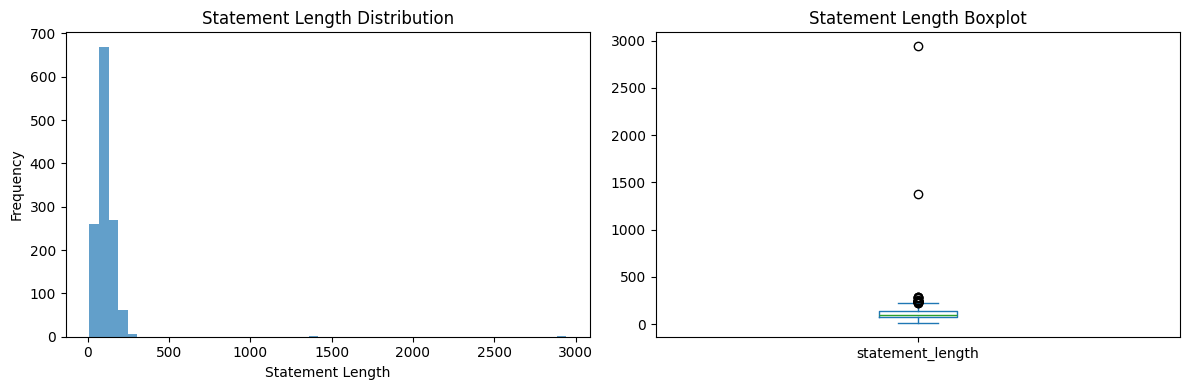


6. MISSING VALUES ANALYSIS:
Missing values in training data:
ID                        0
label                     0
statement                 0
subject                   0
speaker                   0
speaker_job_title       325
state_info              262
party_affiliation         0
barely_true_counts        0
false_counts              0
half_true_counts          0
mostly_true_counts        0
pants_on_fire_counts      0
context                  17
statement_length          0
dtype: int64

Missing values in test data:
ID                        0
label                     0
statement                 0
subject                   0
speaker                   0
speaker_job_title       325
state_info              262
party_affiliation         0
barely_true_counts        0
false_counts              0
half_true_counts          0
mostly_true_counts        0
pants_on_fire_counts      0
context                  17
dtype: int64

7. BASIC STATISTICS SUMMARY:
Training data info:
<class 'pandas.core.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import RandomizedSearchCV
from scipy.sparse import hstack
import warnings
warnings.filterwarnings('ignore')

# ==========================================
# 1. DATA LOADING
# ==========================================
print(">>> LOADING DATA...")

column_names = [
    'ID', 'label', 'statement', 'subject', 'speaker', 'speaker_job_title',
    'state_info', 'party_affiliation', 'barely_true_counts', 'false_counts',
    'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts', 'context'
]

df_train = pd.read_csv(r"test.tsv",sep="\t",header=None,names=column_names)
df_test = pd.read_csv(r"test.tsv", sep="\t", header=None, names=column_names)


# ==========================================
# BASIC EDA - UNIVARIATE ANALYSIS
# ==========================================
print(">>> BASIC EDA - UNIVARIATE ANALYSIS...")
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Dataset Overview
print("\n1. DATASET OVERVIEW:")
print(f"Training data shape: {df_train.shape}")
print(f"Test data shape: {df_test.shape}")
print(f"Training columns: {df_train.columns.tolist()}")

# 2. Target Variable Analysis
print("\n2. TARGET VARIABLE ANALYSIS:")
print("Label distribution in training data:")
print(df_train['label'].value_counts())
print("\nLabel distribution in test data:")
print(df_test['label'].value_counts())

# Plot target variable
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
df_train['label'].value_counts().plot(kind='bar')
plt.title('Training Data - Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
df_test['label'].value_counts().plot(kind='bar')
plt.title('Test Data - Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# 3. Numerical Features Analysis
print("\n3. NUMERICAL FEATURES ANALYSIS:")
numerical_features = ['barely_true_counts', 'false_counts', 'half_true_counts',
                      'mostly_true_counts', 'pants_on_fire_counts']

print("Numerical features summary (Training data):")
print(df_train[numerical_features].describe())

# Plot numerical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    plt.hist(df_train[feature], bins=20, alpha=0.7)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# 4. Categorical Features Analysis
print("\n4. CATEGORICAL FEATURES ANALYSIS:")
categorical_features = ['subject', 'speaker', 'speaker_job_title', 'state_info', 'party_affiliation', 'context']

for feature in categorical_features:
    print(f"\n{feature} - Top 10 values:")
    print(df_train[feature].value_counts().head(10))

# Plot top categories for each categorical feature
plt.figure(figsize=(20, 15))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 2, i)
    df_train[feature].value_counts().head(10).plot(kind='bar')
    plt.title(f'Top 10 {feature}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 5. Text Feature Analysis
print("\n5. TEXT FEATURE ANALYSIS:")
print(f"Statement length statistics (Training data):")
df_train['statement_length'] = df_train['statement'].str.len()
print(df_train['statement_length'].describe())

# Plot statement length distribution
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(df_train['statement_length'], bins=50, alpha=0.7)
plt.title('Statement Length Distribution')
plt.xlabel('Statement Length')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
df_train['statement_length'].plot(kind='box')
plt.title('Statement Length Boxplot')

plt.tight_layout()
plt.show()

# 6. Missing Values Analysis
print("\n6. MISSING VALUES ANALYSIS:")
print("Missing values in training data:")
print(df_train.isnull().sum())
print("\nMissing values in test data:")
print(df_test.isnull().sum())

# 7. Basic Statistics Summary
print("\n7. BASIC STATISTICS SUMMARY:")
print("Training data info:")
print(df_train.info())
print("\nTest data info:")
print(df_test.info())

print("\n>>> EDA COMPLETE!")
# ==========================================
# 2. DATA CLEANING
# ==========================================
print(">>> CLEANING DATA...")

# Fill null values for train data
df_train['speaker_job_title'] = df_train['speaker_job_title'].fillna(df_train.groupby('context')['speaker_job_title'].transform(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown_Mode'))
df_train['state_info'].fillna(df_train['state_info'].mode()[0], inplace=True)
df_train['context'].fillna(df_train['context'].mode()[0], inplace=True)
df_train['speaker_job_title'].fillna("Not_available", inplace=True)

df_train['barely_true_counts'].fillna(0.0, inplace=True)
df_train['false_counts'].fillna(0.0, inplace=True)
df_train['half_true_counts'].fillna(0.0, inplace=True)
df_train['mostly_true_counts'].fillna(0.0, inplace=True)
df_train['pants_on_fire_counts'].fillna(0.0, inplace=True)
df_train['party_affiliation'].fillna('Unknown', inplace=True)
df_train['subject'].fillna('Unknown', inplace=True)
df_train['speaker'].fillna('Unknown', inplace=True)

# Fill null values for test data
df_test['speaker_job_title'] = df_test['speaker_job_title'].fillna(df_test.groupby('context')['speaker_job_title'].transform(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown_Mode'))
df_test['state_info'].fillna(df_test['state_info'].mode()[0], inplace=True)
df_test['context'].fillna(df_test['context'].mode()[0], inplace=True)
df_test['speaker_job_title'].fillna("Not_available", inplace=True)

df_test['barely_true_counts'].fillna(0.0, inplace=True)
df_test['false_counts'].fillna(0.0, inplace=True)
df_test['half_true_counts'].fillna(0.0, inplace=True)
df_test['mostly_true_counts'].fillna(0.0, inplace=True)
df_test['pants_on_fire_counts'].fillna(0.0, inplace=True)
df_test['party_affiliation'].fillna('Unknown', inplace=True)
df_test['subject'].fillna('Unknown', inplace=True)
df_test['speaker'].fillna('Unknown', inplace=True)

# Drop rows with missing labels
df_train.dropna(subset=['label'], inplace=True)
df_test.dropna(subset=['label'], inplace=True)

df_train.isna().sum()

# ==========================================
# 3. LABEL ENCODING
# ==========================================
print(">>> ENCODING LABELS...")

le = LabelEncoder()
Y_train = le.fit_transform(df_train['label'])
Y_test = le.transform(df_test['label'])

Y_train
Y_test
# ==========================================
# 4. TEXT FEATURE ENGINEERING (TF-IDF)
# ==========================================
print(">>> TEXT FEATURE ENGINEERING...")

tfidf = TfidfVectorizer(stop_words='english', max_features=5000,ngram_range=(2,2))
X_train_text = tfidf.fit_transform(df_train['statement'])
X_test_text = tfidf.transform(df_test['statement'])
# Show TF-IDF features as DataFrame
feature_names = tfidf.get_feature_names_out()
tfidf_df = pd.DataFrame(X_train_text.toarray(), columns=feature_names)

print("TF-IDF Feature DataFrame:")
print(tfidf_df.head())  # Show first 5 rows

print(f"TF-IDF DataFrame shape: {tfidf_df.shape}")

print(f"Sample feature names: {feature_names[:10]}")  # First 10 feature names
# ==========================================
# 5. CATEGORICAL FEATURE ENGINEERING
# ==========================================
print(">>> CATEGORICAL FEATURE ENGINEERING...")

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=True)
categorical_features = ['speaker_job_title', 'state_info', 'party_affiliation']

X_train_cat = encoder.fit_transform(df_train[categorical_features])
X_test_cat = encoder.transform(df_test[categorical_features])

# ==========================================
# 6. NUMERICAL FEATURE ENGINEERING
# ==========================================
print(">>> NUMERICAL FEATURE ENGINEERING...")

numerical_features = ['barely_true_counts', 'false_counts', 'half_true_counts',
                      'mostly_true_counts', 'pants_on_fire_counts']

scaler = StandardScaler()
X_train_num = scaler.fit_transform(df_train[numerical_features])
X_test_num = scaler.transform(df_test[numerical_features])

# ==========================================
# 7. COMBINE ALL FEATURES
# ==========================================
print(">>> COMBINING ALL FEATURES...")

X_train_combined = hstack([X_train_text, X_train_cat, X_train_num])
X_test_combined = hstack([X_test_text, X_test_cat, X_test_num])

print(f"Final training data shape: {X_train_combined.shape}")
print(f"Final test data shape: {X_test_combined.shape}")
# ==========================================
# 8. FEATURE SELECTION
# ==========================================
print(">>> APPLYING FEATURE SELECTION...")

X_train_dense = X_train_combined.toarray()
X_test_dense = X_test_combined.toarray()

selector = SelectKBest(score_func=f_classif, k=1000)
X_train_selected = selector.fit_transform(X_train_dense, Y_train)
X_test_selected = selector.transform(X_test_dense)

print(f"After feature selection - Training shape: {X_train_selected.shape}")
print(f"After feature selection - Test shape: {X_test_selected.shape}")
# logistic regresssion
model_lr = LogisticRegression(max_iter=1000, random_state=42)
model_lr.fit(X_train_selected, Y_train)
lr_pred = model_lr.predict(X_test_selected)
lr_acc = accuracy_score(Y_test, lr_pred)
print(f"Logistic Regression Accuracy: {lr_acc:.4f}")
# Gaussian NB
model_nb = GaussianNB()
model_nb.fit(X_train_selected, Y_train)
nb_pred = model_nb.predict(X_test_selected)
nb_acc = accuracy_score(Y_test, nb_pred)
print(f"Naive Bayes Accuracy: {nb_acc:.4f}")
# Random Forest
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_selected, Y_train)
rf_pred = model_rf.predict(X_test_selected)
rf_acc = accuracy_score(Y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_acc:.4f}")
# Gradient Boosting
model_gb = GradientBoostingClassifier(random_state=42)
model_gb.fit(X_train_selected, Y_train)
gb_pred = model_gb.predict(X_test_selected)
gb_acc = accuracy_score(Y_test, gb_pred)
print(f"Gradient Boosting Accuracy: {gb_acc:.4f}")
model_ada = AdaBoostClassifier(random_state=42)
model_ada.fit(X_train_selected, Y_train)
ada_pred = model_ada.predict(X_test_selected)
ada_acc = accuracy_score(Y_test, ada_pred)
print(f"AdaBoost Accuracy: {ada_acc:.4f}")
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train_selected, Y_train)
dt_pred = model_dt.predict(X_test_selected)
dt_acc = accuracy_score(Y_test, dt_pred)
print(f"Decision Tree Accuracy: {dt_acc:.4f}")
model_knn = KNeighborsClassifier()
model_knn.fit(X_train_selected, Y_train)
knn_pred = model_knn.predict(X_test_selected)
knn_acc = accuracy_score(Y_test, knn_pred)
print(f"K-Nearest Neighbors Accuracy: {knn_acc:.4f}")
# RESULTS SUMMARY


results = pd.DataFrame({
    'Model': ['Logistic Regression','Naive Bayes', 'Random Forest','Gradient Boosting','AdaBoost','Decision Tree','K-Nearest Neighbors'],
    'Accuracy': [lr_acc, nb_acc,rf_acc,gb_acc,ada_acc,dt_acc,knn_acc]
})

results_sorted = results.sort_values('Accuracy', ascending=False)
print(results_sorted.to_string(index=False))

best_model = results_sorted.iloc[0]
print(f"\n🏆 BEST MODEL: {best_model['Model']} with accuracy: {best_model['Accuracy']:.4f}")
# Random Forest---------------------------------> n_est=200
model_rf = RandomForestClassifier(n_estimators=200, random_state=42)
model_rf.fit(X_train_selected, Y_train)
rf_pred = model_rf.predict(X_test_selected)
rf_acc = accuracy_score(Y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_acc:.4f}")


"""
# 💾 Save the trained model
import pickle
with open(r"C:\Users\tarun\OneDrive\Desktop\Fake news\rf_model.pkl", 'wb') as file:
    pickle.dump(model_rf, file)

print("✅ Model saved as rf_model.pkl")

"""


In [6]:
model_rf = RandomForestClassifier(n_estimators=200, random_state=42)
model_rf.fit(X_train_selected, Y_train)
rf_pred = model_rf.predict(X_test_selected)
rf_acc = accuracy_score(Y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_acc:.4f}")

# Compact evaluation
cm = confusion_matrix(Y_test, rf_pred)
print("\nConfusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(Y_test, rf_pred, target_names=le.classes_))



Random Forest Accuracy: 0.8698

Confusion Matrix:
[[179  10   6  13   0   4]
 [  7 219  10  12   0   1]
 [  3  13 226  23   0   0]
 [  6  13  11 210   0   1]
 [  0   0   0   0  92   0]
 [  5  15   4   8   0 176]]

Classification Report:
              precision    recall  f1-score   support

 barely-true       0.90      0.84      0.87       212
       false       0.81      0.88      0.84       249
   half-true       0.88      0.85      0.87       265
 mostly-true       0.79      0.87      0.83       241
  pants-fire       1.00      1.00      1.00        92
        true       0.97      0.85      0.90       208

    accuracy                           0.87      1267
   macro avg       0.89      0.88      0.88      1267
weighted avg       0.87      0.87      0.87      1267

